In [1]:
# Import modules and libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Assing Dataframes variables
south_df = pd.read_csv('Clean_Data/clean_south.csv').rename(columns={'Unnamed: 0':'Respondent ID'}).set_index('Respondent ID')

midwest_df = pd.read_csv('Clean_Data/clean_midwest.csv').rename(columns={'Unnamed: 0':'Respondent ID'}).set_index('Respondent ID')

income_2014_df = pd.read_csv('Clean_Data/clean_house_inc.csv').set_index('State')

## How many respondents identified with being from the region of the survey?

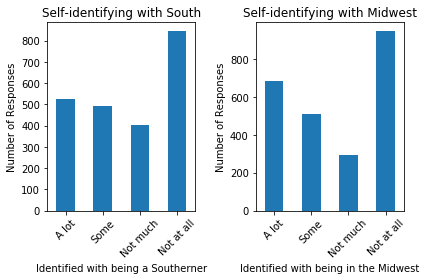

In [3]:
# Create 2 bar graphs with distribution of number response from "A lot" to "Not at all"
plt.subplot(1, 2, 1)
s_ident_count = south_df['Degree of ident.'].value_counts().reindex(['A lot', 'Some', 'Not much', 'Not at all'])
s_ident_count.plot(kind='bar')
plt.title('Self-identifying with South')
plt.ylabel('Number of Responses')
plt.xlabel('Identified with being a Southerner')
plt.xticks(rotation='45')


plt.subplot(1, 2, 2)
m_ident_count = midwest_df['Degree of ident.'].value_counts().reindex(['A lot', 'Some', 'Not much', 'Not at all'])
m_ident_count.plot(kind='bar')
plt.title('Self-identifying with Midwest')
plt.ylabel('Number of Responses')
plt.xlabel('Identified with being in the Midwest')
plt.xticks(rotation='45')

plt.tight_layout()
plt.show()

As we can see above, we have a number of respondents that identify themselves as being in the south and midwest. However, there are a lot that say they do not identify at all. However, I feel these graphs aren't clear because they show how the respondent feels, but not what they would say if they were asked. I would want to look at a comparison of what they said in their written response to their identity with the region. 

## How is each response broken up based on written response?
__Creating a Stacked Barplot to see proportions of certain responses__

### 1. Breakdown the "A lot" response looking at written responses for South data.

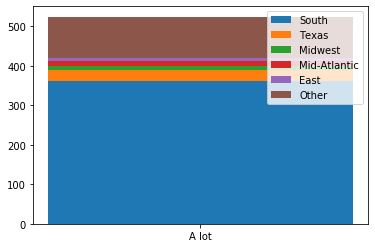

In [4]:
# Isolate the "A lot" responses and "degree of identi" columns. 
a_lot_s = south_df[['Written in Response','Degree of ident.']].loc[south_df['Degree of ident.']=='A lot']

# Pull all written responses that have the word "south" in them. 
s_written = a_lot_s[a_lot_s.iloc[:,0].str.match('.*?outh', case=False)].iloc[:,0]

# Find the total from "A lot" that used south in their response. 
total_south = s_written.value_counts().sum()

# All other responses
not_south = a_lot_s[~a_lot_s.isin(s_written)].dropna().iloc[:,0]

# Subcategories of responses other than "south"
texas = not_south[not_south.str.match('.*?xas', case=False)].count()

mid_w = not_south[not_south.str.match('.*?mid.*?west', case=False)].count()

mid_atlantic = not_south[not_south.str.match('.*?atlan', case=False)].count()

east = not_south[not_south.str.match('^east.*o|eastern$', case=False)].count()

# Total number of other responses remaining that did not contain texas, midwest, atlantic, or east
other = not_south.count()-(texas+mid_w+mid_atlantic+east)

p1 = plt.bar('A lot', total_south)
p2 = plt.bar('A lot', texas, bottom = total_south)
p3 = plt.bar('A lot', mid_w, bottom = (total_south+texas))
p4 = plt.bar('A lot', mid_atlantic, bottom = (total_south+texas+mid_w))
p5 = plt.bar('A lot', east, bottom = (total_south+texas+mid_w+mid_atlantic))
p6 = plt.bar('A lot', other, bottom = (total_south+texas+mid_w+mid_atlantic+east))

plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0],p6[0]),
           ('South', 'Texas', 'Midwest', 'Mid-Atlantic', 'East', 'Other'),
           loc= 'upper right'
          )

plt.tight_layout
plt.show()

### 2. Create functions that can replicate the above code for all columns in South dataset

In [5]:
# Create a function to isolate all responses and break down into same categories as above.
def degree_breakdown_s(response):
    
    # Extract all responses containing the word "south". 
    south = response[response.iloc[:,0].str.match('.*?outh', case=False)].iloc[:,0]
    
    # Extract all responses without the word "south". 
    not_south = response[~response.isin(south)].dropna().iloc[:,0]
    
    # All texas, midwest, atlantic, east, and other responses without "south".
    texas = not_south[not_south.str.match('.*?xas', case=False)].count()
    
    mid_w = not_south[not_south.str.match('.*?mid.*?west', case=False)].count()
    
    mid_atlantic = not_south[not_south.str.match('.*?atlan', case=False)].count()
    
    east = not_south[not_south.str.match('^east.*o|eastern$', case=False)].count()
    
    other = not_south.count()-(texas+mid_w+mid_atlantic+east)
    
    # Return list of values with south as the first one.
    return(south.value_counts().sum(), texas, mid_w, mid_atlantic, east, other)

In [6]:
# Define "identity_breakdown_s" function, which will go through each category of the south dataset and
# break them down into their subcategories based on written reponse.

def identity_breakdown_s(region):
    
    # Break the written responses into four categories: "A lot", "Some", "Not much", and "Not at all"
    a_lot = region[['Written in Response','Degree of ident.']].loc[region['Degree of ident.']=='A lot']
    some = region[['Written in Response','Degree of ident.']].loc[region['Degree of ident.']=='Some']
    not_much = region[['Written in Response','Degree of ident.']].loc[region['Degree of ident.']=='Not much']
    not_at_all = region[['Written in Response','Degree of ident.']].loc[region['Degree of ident.']=='Not at all']
    
    # Breakdown each degree response by whether the written response had south, texas, midwest, atlantic, east,
    # or other reponses.
    return(degree_breakdown_s(a_lot), degree_breakdown_s(some), degree_breakdown_s(not_much),degree_breakdown_s(not_at_all))

### 3. Create stacked bar graphs to show proportions of responses for south data.

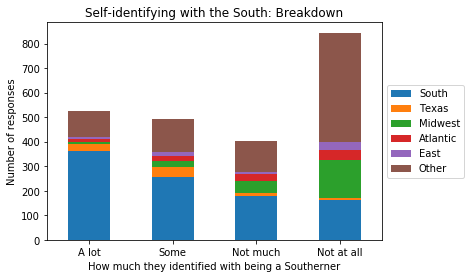

In [36]:
# Create a dataframe to store information and create a stacked barplot.
data_s ={'South':[],'Texas':[],'Midwest':[],'Atlantic':[],'East':[],'Other':[]}

for item in identity_breakdown_s(south_df):
    data_s['South'].append(item[0])
    data_s['Texas'].append(item[1])
    data_s['Midwest'].append(item[2])
    data_s['Atlantic'].append(item[3])
    data_s['East'].append(item[4])
    data_s['Other'].append(item[5])

bd_south_df = pd.DataFrame(index = ['A lot', 'Some', 'Not much', 'Not at all'],
                                   data = data_s)

bd_south_df.plot(kind = 'bar', stacked=True)
plt.title('Self-identifying with the South: Breakdown')
plt.xlabel('How much they identified with being a Southerner')
plt.xticks(rotation='0')
plt.ylabel('Number of responses')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### __Analysis of South data distribution responses:__
As we can see above, a large amount of people that said they identified with being a southerner either "A lot" or "Some" also had written "south" in their responses. As expected, the number of responses with the word "south" in them drops as the degree to which people identified as being southerner goes down as well. However, what is interesting is that it does not drop seemingly significantly. There are still close to 200 responses in both the "not much" and "not at all" category that had used "south" in their response. Another interesting note is the overwhelming amount of "other" responses in the "not at all" category.

In [8]:
# Looking at the "not at all" to see what type of other responses were given for not at all
not_at_all_s = south_df[['Written in Response','Degree of ident.']].loc[south_df['Degree of ident.']=='Not at all']
not_at_all_s[not_at_all_s.iloc[:,0].str.match('.*?outh', case=False)].iloc[:,0].value_counts()
not_at_all_s[not_at_all_s.iloc[:,0].str.match('.*?orth', case=False)].iloc[:,0].value_counts().sum()

160

### 4. Create functions and stacked bar graph for midwest data

In [9]:
# Create a function to isolate all responses and break down into same categories for midwest
def degree_breakdown_m(response):
    
    # Extract all responses containing the word "midwest". 
    midwest = response[response.iloc[:,0].str.match('.*?mid.*?wes', case=False)].iloc[:,0]
    
    # Extract all responses without the word "midwest". 
    not_mid = response[~response.isin(midwest)].dropna().iloc[:,0]
    
    # All texas, south, atlantic, east, and other responses without "midwest".
    # Filtering out each response to ensure reponses are not counted twice.
    
    texas = not_mid[not_mid.str.match('.*?xas', case=False)]
    tex = texas.count()
    
    # Filter out texas from choices for "south".
    no_t = not_mid[~not_mid.isin(texas)]
    south = no_t[no_t.str.match('.*?outh', case=False)] # Extracting all responses with "south"
    sou = south.count()
    
    # Filtering out texas and south from choices for "mid-atlantic".
    no_ts = no_t[~no_t.isin(south)]
    mid_atlantic = no_ts[no_ts.str.match('.*?atlan', case=False)]
    mid_atl = mid_atlantic.count()
    
    # Filtering out texas, south, and mid-atlantic for "east coast/eastern".
    no_tsa = no_ts[~no_ts.isin(mid_atlantic)]
    east = no_tsa[no_tsa.str.match('^east.*o|eastern$', case=False)]
    e = east.count()
    
    # Adding an additional search for the term "rock" or "mountain".
    no_tsae = no_tsa[~no_tsa.isin(east)] # filtering out east
    mountain = no_tsae[no_tsae.str.match('.*?rock|.*?mount', case=False)]
    mount = mountain.count()
    
    # Search for term "northeast" in response.
    no_tsaem = no_tsae[~no_tsae.isin(mountain)]
    northeast = no_tsaem[no_tsaem.str.match('.*?orth.*?eas|.*?eng', case=False)]
    ne = northeast.count()
    
    # Search for term West/west coast in response.
    no_tsaemn = no_tsaem[~no_tsaem.isin(northeast)]
    west = no_tsaemn[no_tsaemn.str.match('.*?west$|.*?west.*?co', case=False)]
    w = west.count()
    
    # Finding remaining number of other responses.
    other = not_mid.count()-(tex+sou+mid_atl+e+mount+ne+w)
    
    # Return list of values with south as the first one.
    return(midwest.value_counts().sum(), 
           tex, 
           sou, 
           mid_atl,
           e, 
           mount,
           ne,
           w,
           other)

In [10]:
# Define "identity_breakdown_m" function to breakdown written reponses for midwest dataset.

def identity_breakdown_m(region):
    
    # Break the written responses into four categories: "A lot", "Some", "Not much", and "Not at all"
    a_lot = region[['Written in Response','Degree of ident.']].loc[region['Degree of ident.']=='A lot']
    some = region[['Written in Response','Degree of ident.']].loc[region['Degree of ident.']=='Some']
    not_much = region[['Written in Response','Degree of ident.']].loc[region['Degree of ident.']=='Not much']
    not_at_all = region[['Written in Response','Degree of ident.']].loc[region['Degree of ident.']=='Not at all']
    
    # Replace the NaN value in the written reponse for "Not at all" response as an empty string
    not_at_all = not_at_all.replace(np.nan,'')
    
    # Breakdown each degree response by whether the written response had midwest, texas, south, atlantic, east,
    # mountain, northeast, or other reponses.
    return(degree_breakdown_m(a_lot), degree_breakdown_m(some), degree_breakdown_m(not_much), degree_breakdown_m(not_at_all))

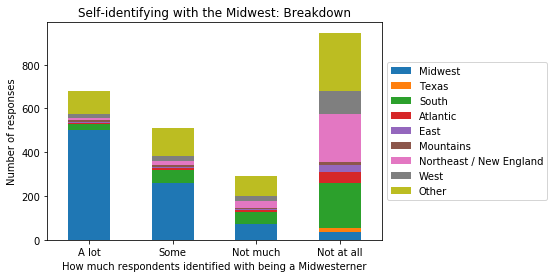

In [37]:
# Create a stacked bargraph to show the differences in written responses in each category

data_m ={'Midwest':[],
         'Texas':[],
         'South':[],
         'Atlantic':[],
         'East':[],
         'Mountains':[],
         'Northeast / New England':[],
         'West':[],
         'Other':[]}

for item in identity_breakdown_m(midwest_df):
    data_m['Midwest'].append(item[0])
    data_m['Texas'].append(item[1])
    data_m['South'].append(item[2])
    data_m['Atlantic'].append(item[3])
    data_m['East'].append(item[4])
    data_m['Mountains'].append(item[5])
    data_m['Northeast / New England'].append(item[6])
    data_m['West'].append(item[7])
    data_m['Other'].append(item[8])

bd_midwest_df = pd.DataFrame(index = ['A lot', 'Some', 'Not much', 'Not at all'],
                                   data = data_m)

# Show plot of midwest responses broken down by 
bd_midwest_df.plot(kind='bar', stacked=True)
plt.title('Self-identifying with the Midwest: Breakdown')
plt.xlabel('How much respondents identified with being a Midwesterner')
plt.xticks(rotation='0')
plt.ylabel('Number of responses')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### __Analysis of Midwest data distribution responses:__
Looking at the graph above for midwest reponses, it follows more of the pattern we would expect in regards to number of responses with the word "midwest" within them. The use of the word "midwest" decreases as the respondents less identify themselves as midwesterners.
<br> An interesting trend seems to be that as the term "south" is used in more responses, there is less identity with being called a "Midwesterner". This same pattern also holds true for the term "Northeast" or "New England". Furthermore, the use of the term 'Rock' or "mountains" in responses shows no seeming pattern as it appears nearly as frequentely in the responses of people who identified "A lot" through "Not at All".
<br> The remaining "other" responses are either unique responses that only occur once, slang for certain regions that occur a handleful of times, or just individual states. I've decided to leave this group together to see if perhaps there can be a comparison later since most responses fell into one of the eight other categories.

In [12]:
# Testing area to see what happens after you filter most responses out of not at all category
x = midwest_df[['Written in Response','Degree of ident.']].loc[midwest_df['Degree of ident.']=='Not at all']
x = x.replace(np.nan,'')
midw = x[x.iloc[:,0].str.match('.*?mid.*?wes', case=False)].iloc[:,0]
not_midw = x[~x.isin(midw)].dropna().iloc[:,0]
a = not_midw[not_midw.str.match('.*?outh', case=False)]
other_1 = not_midw[~not_midw.isin(a)]
b = not_midw[not_midw.str.match('^east.*o|eastern$', case=False)]
other_2 = other_1[~other_1.isin(b)]
c = not_midw[not_midw.str.match('.*?atlan', case=False)]
other_3 = other_2[~other_2.isin(c)]
d = not_midw[not_midw.str.match('.*?rock|.*?mount', case=False)]
other_4 = other_3[~other_3.isin(d)]
e = not_midw[not_midw.str.match('.*?orth.*?eas', case=False)]
other_5 = other_4[~other_4.isin(e)]
f = not_midw[not_midw.str.match('.*?west$|.*?west.*?co', case=False)]
other_6 = other_5[~other_5.isin(f)]


## What states did respondents mostly submit as Southern or Midwestern?

In [13]:
# Create a function for counting the voted states into a dictionary

def state_count(region):
    state_count = {}
    for states in region:
        states = states.replace('[','').replace(']','').replace("'","").split(',')
        for state in states:
            state = state.strip()
            if state not in state_count:
                state_count[state] = 1
            else:
                state_count[state] += 1
                
    # Return a sorted list from most votes to least
    
    return sorted(state_count.items(), key = lambda item: item[1], reverse = True)

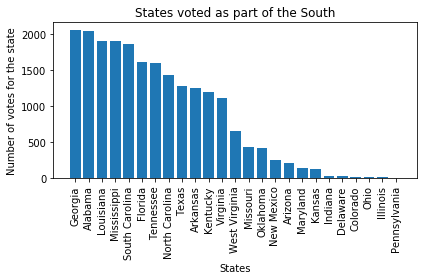

In [14]:
# Plotting votes for southern states 

southern = south_df['Southern?'] # Selecting column of interest

plt.bar(*zip(*state_count(southern)))
plt.title('States voted as part of the South')
plt.xlabel('States')
plt.ylabel('Number of votes for the state')
plt.xticks(rotation = '90')

plt.tight_layout()
plt.show()

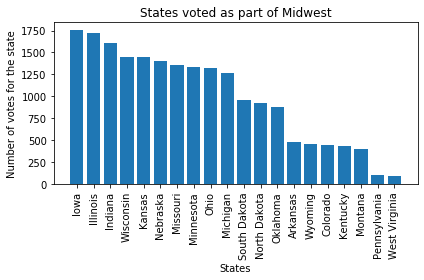

In [15]:
# Plotting votes for midwest states

midwestern = midwest_df['Midwestern?'] # Selecting column of interest

plt.bar(*zip(*state_count(midwestern)))
plt.title('States voted as part of Midwest')
plt.xlabel('States')
plt.ylabel('Number of votes for the state')
plt.xticks(rotation = '90')

plt.tight_layout()
plt.show()

We can see some clear distinctions between states for which ones people thought of as being part of the midwest or south. In fact, for the south data, we see a ignificant drop in votes between virginia and west virginia. Next, let's look how how this distribution looks like by how people identified themselves.

### What does distribution look like based on how much respondents identified as southern?

In [16]:
# Define a function that counts states split into the 4 categories of "degree of ident."
def ident_st_c(region_df):
    a_lot = region_df.iloc[:,1:3].loc[region_df['Degree of ident.'] == 'A lot']
    some = region_df.iloc[:,1:3].loc[region_df['Degree of ident.'] == 'Some']
    nm = region_df.iloc[:,1:3].loc[region_df['Degree of ident.'] == 'Not much']
    naa = region_df.iloc[:,1:3].loc[region_df['Degree of ident.'] == 'Not at all']
    
    sc_by_degree = {'A lot': state_count(a_lot.iloc[:,1]),
                    'Some': state_count(some.iloc[:,1]), 
                    'Not much': state_count(nm.iloc[:,1]),
                    'Not at all': state_count(naa.iloc[:,1])}
    
    return sc_by_degree

In [17]:
# define a funtion that is able to sort the values of into a dictionary.
def states_by_votes(dict_idstc):
    empty = {}
    for item in dict_idstc:
        states = dict_idstc[item]
        for state in states:
            if state[0] in empty:
                empty[state[0]].append(state[1])
            if state[0] not in empty:
                empty[state[0]] = [state[1]]
    return dict(sorted(empty.items(), key = lambda item: sum(item[1]), reverse = True))

In [18]:
states_by_votes(ident_st_c(south_df))

{'Georgia': [473, 442, 370, 769],
 'Alabama': [470, 432, 368, 762],
 'Louisiana': [424, 399, 349, 734],
 'Mississippi': [430, 414, 336, 724],
 'South Carolina': [412, 403, 327, 710],
 'Florida': [368, 347, 278, 623],
 'Tennessee': [376, 349, 281, 592],
 'North Carolina': [332, 305, 256, 533],
 'Texas': [303, 275, 213, 489],
 'Arkansas': [264, 256, 220, 514],
 'Kentucky': [254, 252, 212, 476],
 'Virginia': [243, 251, 184, 429],
 'West Virginia': [108, 131, 103, 307],
 'Missouri': [72, 83, 90, 184],
 'Oklahoma': [104, 93, 55, 169],
 'New Mexico': [48, 51, 39, 115],
 'Arizona': [42, 44, 36, 93],
 'Maryland': [21, 42, 32, 54],
 'Kansas': [18, 20, 26, 71],
 'Indiana': [5, 8, 5, 18],
 'Delaware': [4, 6, 7, 18],
 'Colorado': [4, 4, 7, 10],
 'Ohio': [4, 4, 3, 12],
 'Illinois': [5, 2, 4, 9],
 'Pennsylvania': [3, 1, 5, 2]}

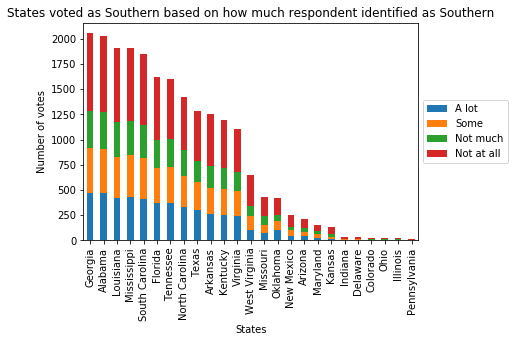

In [19]:
# Graph South data as split by "degree of ident."

# Dataframe for "degree of ident." and "state counts"
dsc_s_df = pd.DataFrame(index = ['A lot', 'Some', 'Not much', 'Not at all'],
                      data = states_by_votes(ident_st_c(south_df))).swapaxes('index', 'columns')

# Show plot of midwest responses broken down by 
dsc_s_df.plot(kind='bar', stacked=True)
plt.title('States voted as Southern based on how much respondent identified as Southern')
plt.xlabel('States')
plt.ylabel('Number of votes')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

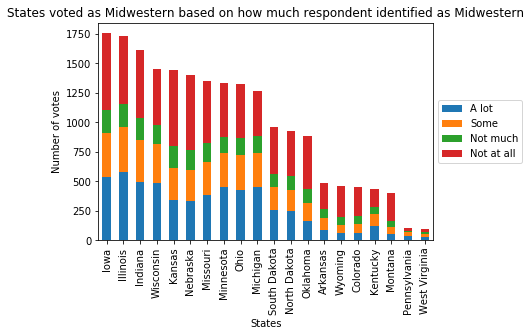

In [20]:
# Graph midwestern data as split by "degree of ident."

# Dataframe for "degree of ident." and "state counts"
dsc_m_df = pd.DataFrame(index = ['A lot', 'Some', 'Not much', 'Not at all'],
                      data = states_by_votes(ident_st_c(midwest_df))).swapaxes('index', 'columns')

# Show plot of midwest responses broken down by 
dsc_m_df.plot(kind='bar', stacked=True)
plt.title('States voted as Midwestern based on how much respondent identified as Midwestern')
plt.xlabel('States')
plt.ylabel('Number of votes')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### __Analysis of South and Midwest state distribution data based on responses:__
As we can see above in both the midwestern and southern data, a large amount of the voting for states comes from respondents that do not identify as being either a Southerner or Midwesterner.
<br> Looking at the Southern data, an interesting point in the graph is the comparison of those that identify "A lot" or "some" Southern voted less for Louisiana as considered part of the south.
<br> For the midwestern data, those that identified more closely as being a midwesterner voted less for the states Kansas, Nebraska, and Missouri despite the fact that overall, those states were voted into the top 7 of midwestern states. This mostly likely has to do with the number of respondents that do "Not at all" idenfity as Midwestern, yet voted for these states.

## What was the distribution of income in regards to region identity?

In [21]:
# Graphing a comparison of the "degree of ident." with reported income.
def ident_inc(region_df):
    a_lot = region_df.iloc[:,[1,6]].loc[region_df['Degree of ident.'] == 'A lot']
    some = region_df.iloc[:,[1,6]].loc[region_df['Degree of ident.'] == 'Some']
    nm = region_df.iloc[:,[1,6]].loc[region_df['Degree of ident.'] == 'Not much']
    naa = region_df.iloc[:,[1,6]].loc[region_df['Degree of ident.'] == 'Not at all']
    
    ind = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+' ]
    
    # income distribution by identity.
    income_dist = {'A lot': list(a_lot.iloc[:,1].value_counts().reindex(ind)),
                   'Some': list(some.iloc[:,1].value_counts().reindex(ind)),
                   'Not much': list(nm.iloc[:,1].value_counts().reindex(ind)),
                   'Not at all': list(naa.iloc[:,1].value_counts().reindex(ind))}
    
    return (income_dist)

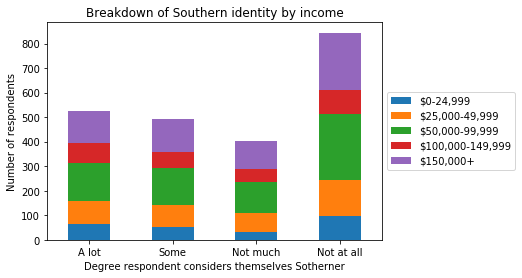

In [22]:
# Income breakdown by identity dataframe for South data
income_bd_s_df = pd.DataFrame(index = ['$0-24,999', '$25,000-49,999', '$50,000-99,999', '$100,000-149,999', '$150,000+'],
                            data = ident_inc(south_df))

income_bd_s_df.swapaxes('index', 'columns').plot(kind='bar', stacked= True)
plt.title('Breakdown of Southern identity by income')
plt.xlabel('Degree respondent considers themselves Sotherner')
plt.xticks(rotation ='0')
plt.ylabel('Number of respondents')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

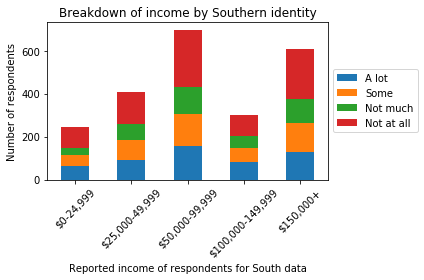

In [23]:
# Graph of south data looking at how many respondents make a certain income, and how they identify.
income_bd_s_df.plot(kind='bar', stacked= True)
plt.title('Breakdown of income by Southern identity')
plt.xlabel('Reported income of respondents for South data')
plt.xticks(rotation ='45')
plt.ylabel('Number of respondents')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

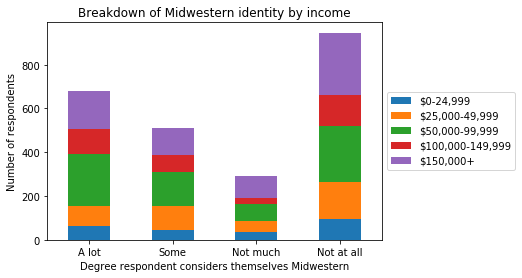

In [24]:
# Income breakdown by identity dataframe for Midwest data
income_bd_m_df = pd.DataFrame(index = ['$0-24,999', '$25,000-49,999', '$50,000-99,999', '$100,000-149,999', '$150,000+'],
                            data = ident_inc(midwest_df))

income_bd_m_df.swapaxes('index', 'columns').plot(kind='bar', stacked= True)
plt.title('Breakdown of Midwestern identity by income')
plt.xlabel('Degree respondent considers themselves Midwestern')
plt.xticks(rotation ='0')
plt.ylabel('Number of respondents')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

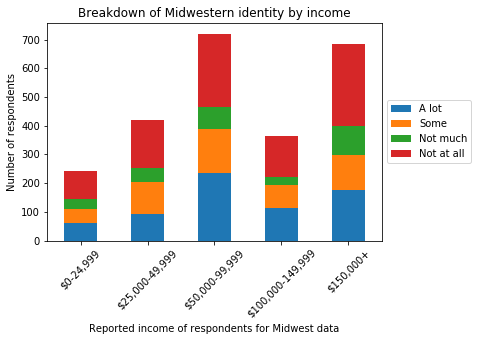

In [25]:
# Graphing midweast data but looking at income as broken down by responses
income_bd_m_df.plot(kind='bar', stacked= True)
plt.title('Breakdown of Midwestern identity by income')
plt.xlabel('Reported income of respondents for Midwest data')
plt.xticks(rotation ='45')
plt.ylabel('Number of respondents')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### __Analysis of South and Midwest income distribution based on identity:__
Proportionally, the differences in income seem to be in a similiar breakdown in both the south and midwest data. As we can see, since there were a number of respondents that do "Not at all" identify themselves with being from these regions, their data seems to overshadow those who do identify as being Midwerstern or Southern. Yet, we can see that a fair number of respondents who identify with being Midwestern or Southern seem to make between fifty and a hundred thousand and over $150 thousand. This would be a good place to compare the median income of the states that were voted as midwestern or southern and see what the average income was for them back in 2014.

### Comparing reported median income per state in 2014 to South and Midwest data

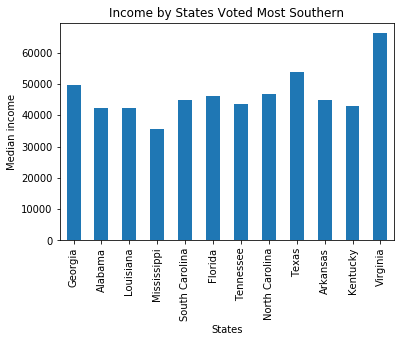

In [26]:
# Top states voted to be in the south or southern.
voted_s = ['Georgia',
           'Alabama',
           'Louisiana',
           'Mississippi',
           'South Carolina',
           'Florida',
           'Tennessee',
           'North Carolina',
           'Texas',
           'Arkansas',
           'Kentucky',
           'Virginia']

# Top states voted to be in the midwest.
voted_m = ['Iowa',
           'Illinois',
           'Indiana',
           'Wisconsin',
           'Kansas',
           'Nebraska',
           'Missouri',
           'Minnesota',
           'Ohio',
           'Michigan']

# Graphing data to show 
income_2014_df.loc[voted_s,'2014'].plot(kind='bar')
plt.title('Income by States Voted Most Southern')
plt.xlabel('States')
plt.ylabel('Median income')
plt.show()

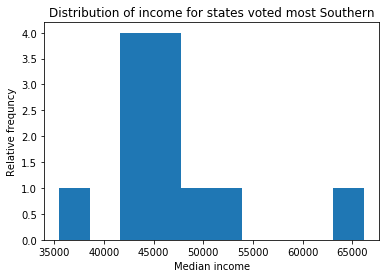

In [27]:
# Graphing with a histogram to show frequency of income.
income_2014_df.loc[voted_s,'2014'].plot(kind='hist')
plt.title('Distribution of income for states voted most Southern')
plt.xlabel('Median income')
plt.ylabel('Relative frequncy')
plt.show()

#### __Analysis of South median income data in 2014:__
As you can see above for the states voted most southern, the median income for those states was closer to 45 and 50 thousand, fitting with the data we have collected from our survey takers. It is interesting to note that this data is recorded as median household income for the state, yet the survery takers had a number that recorded their income as $150 thousand and over.

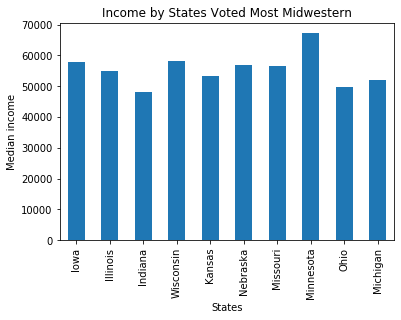

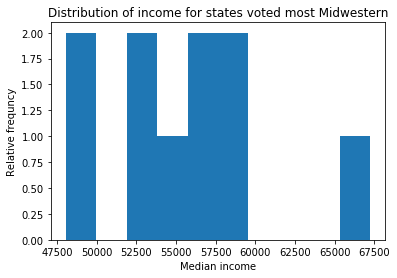

In [55]:
# Graphing midwest median income
income_2014_df.loc[voted_m,'2014'].plot(kind='bar')
plt.title('Income by States Voted Most Midwestern')
plt.xlabel('States')
plt.ylabel('Median income')
plt.show()

# Graphing with a histogram to show frequency of income.
income_2014_df.loc[voted_m,'2014'].plot(kind='hist')
plt.title('Distribution of income for states voted most Midwestern')
plt.xlabel('Median income')
plt.ylabel('Relative frequncy')
plt.show()

#### __Analysis of Midwest median income data in 2014:__
For the midwest data, this distribution is actually higher than in the southern states. This also lines up well with the survey data that showed more people who identified as Midwesterner as having over $50 thousand for median income, than those who identified as being Southerner.

## What was the education level of respondents based on region identity?

In [29]:
# Graph the distribution of education by "degree of ident."
def ident_edu(region_df):
    a_lot = region_df.iloc[:,[1,7]].loc[region_df['Degree of ident.'] == 'A lot']
    some = region_df.iloc[:,[1,7]].loc[region_df['Degree of ident.'] == 'Some']
    nm = region_df.iloc[:,[1,7]].loc[region_df['Degree of ident.'] == 'Not much']
    naa = region_df.iloc[:,[1,7]].loc[region_df['Degree of ident.'] == 'Not at all']
    
    ind = ['Less than high school degree',
       'High school degree',
       'Some college',
       'Associate or bachelor degree',
       'Graduate degree']
    
    # income distribution by identity.
    edu_dist = {'A lot': list(a_lot.iloc[:,1].value_counts().reindex(ind)),
                   'Some': list(some.iloc[:,1].value_counts().reindex(ind)),
                   'Not much': list(nm.iloc[:,1].value_counts().reindex(ind)),
                   'Not at all': list(naa.iloc[:,1].value_counts().reindex(ind))}
    
    return (edu_dist)

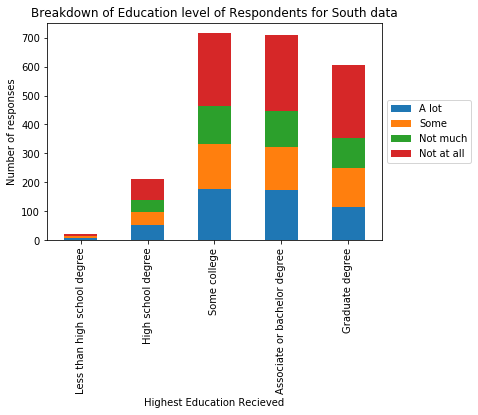

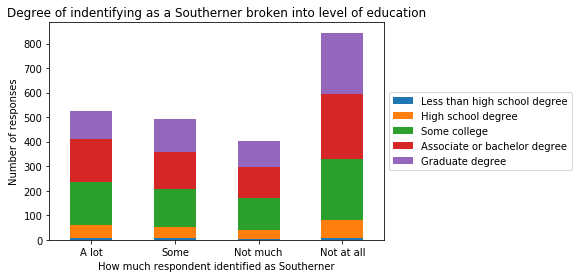

In [41]:
# Education breakdown based on how much person identifies with being Southerner
edu_bd_s_df = pd.DataFrame(index = ['Less than high school degree',
                                    'High school degree',
                                    'Some college',
                                    'Associate or bachelor degree',
                                    'Graduate degree'],
                            data = ident_edu(south_df))

edu_bd_s_df.plot(kind='bar', stacked = True)
plt.title('Breakdown of Education level of Respondents for South data')
plt.xlabel('Highest Education Recieved')
plt.ylabel('Number of responses')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


# Looking now just at degree of identifying with being a Southerner, broken down by education
edu_bd_s_df.swapaxes('index','columns').plot(kind='bar', stacked = True)
plt.title('Degree of indentifying as a Southerner broken into level of education')
plt.xlabel('How much respondent identified as Southerner')
plt.xticks(rotation='0')
plt.ylabel('Number of responses')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

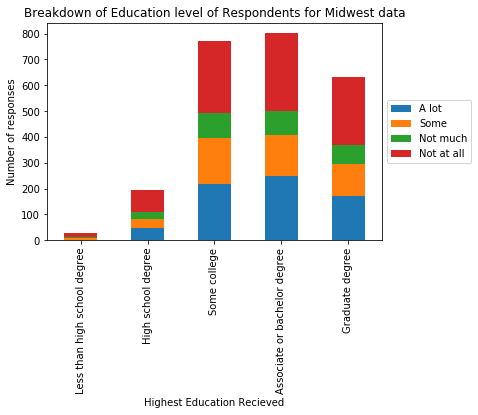

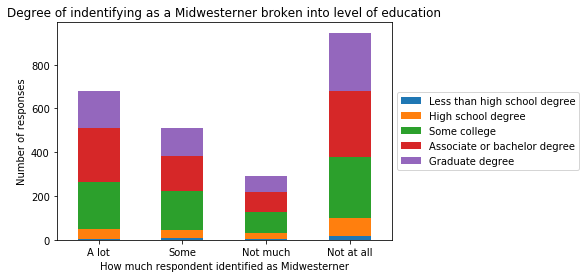

In [42]:
# Education breakdown based on how much person identifies with being Midwesterner
edu_bd_m_df = pd.DataFrame(index = ['Less than high school degree',
                                    'High school degree',
                                    'Some college',
                                    'Associate or bachelor degree',
                                    'Graduate degree'],
                            data = ident_edu(midwest_df))

edu_bd_m_df.plot(kind='bar', stacked = True)
plt.title('Breakdown of Education level of Respondents for Midwest data')
plt.xlabel('Highest Education Recieved')
plt.ylabel('Number of responses')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Looking now just at degree of identifying with being a Southerner, broken down by education
edu_bd_m_df.swapaxes('index','columns').plot(kind='bar', stacked = True)
plt.title('Degree of indentifying as a Midwesterner broken into level of education')
plt.xlabel('How much respondent identified as Midwesterner')
plt.xticks(rotation='0')
plt.ylabel('Number of responses')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### __Analysis of Education data:__
Nothing of note appears here. Proportionally, according to how people identify as being Midwestern or Southern, there is no significat differences or surprising distributions of the data. Most of the respondants had at least some college level education, but outside of that, education level does not seem to influence by how much a person identifies as a Southerner or Midwesterner.

## Final breakdown for what respondents chose for Census Region Location:
### How did the selected census region data compare against how much people identified with their region?

Survey takers were allowed to record which region they fell into based on the catagories that the federal census defined for states. By comparing the degree to which a person identified with being a Southerner and Midwesterner with their actual location of region, we can see how inline their earlier responses in the survey were with their actual, relative locations.

In [32]:
# Define a function that can search through dataframes and extract "degree of ident." data and "census region"
def ident_reg(region_df):
    a_lot = region_df.iloc[:,[1,8]].loc[region_df['Degree of ident.'] == 'A lot']
    some = region_df.iloc[:,[1,8]].loc[region_df['Degree of ident.'] == 'Some']
    nm = region_df.iloc[:,[1,8]].loc[region_df['Degree of ident.'] == 'Not much']
    naa = region_df.iloc[:,[1,8]].loc[region_df['Degree of ident.'] == 'Not at all']
    
    ind = ['South Atlantic',
           'West South Central',
           'East South Central',
           'West North Central',
           'East North Central',
           'Pacific',
           'Middle Atlantic',
           'Mountain',
           'New England']
    
    # Census Distribution based on "degree of ident."
    census_dist = {'A lot': list(a_lot.iloc[:,1].value_counts().reindex(ind)),
                   'Some': list(some.iloc[:,1].value_counts().reindex(ind)),
                   'Not much': list(nm.iloc[:,1].value_counts().reindex(ind)),
                   'Not at all': list(naa.iloc[:,1].value_counts().reindex(ind))}

    return(census_dist)

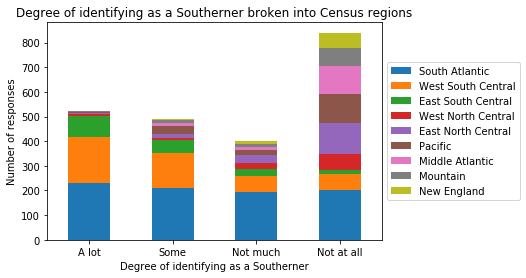

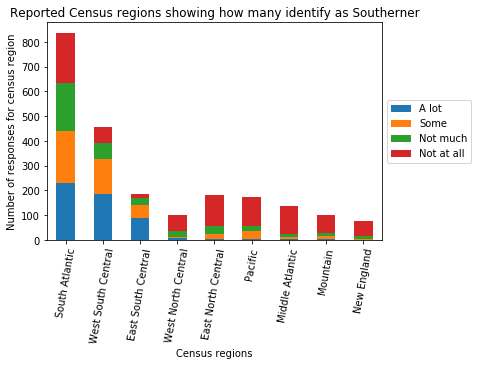

In [33]:
# Create a dataframe to easily stack data for census breakdown of southern dataframe: census_bd_s_df
census_bd_s_df = pd.DataFrame(index = ['South Atlantic',
                                       'West South Central',
                                       'East South Central',
                                       'West North Central',
                                       'East North Central',
                                       'Pacific',
                                       'Middle Atlantic',
                                       'Mountain',
                                       'New England'],
                              data = ident_reg(south_df))

# Graph the distribution of census regions based on "degree of ident."
census_bd_s_df.swapaxes('index', 'columns').plot(kind='bar', stacked = True)
plt.title('Degree of identifying as a Southerner broken into Census regions')
plt.xlabel('Degree of identifying as a Southerner')
plt.xticks(rotation = '0')
plt.ylabel('Number of responses')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Graph the distribution of census data looking at reported census regions
# broken into how many identified as a Southerner.
census_bd_s_df.plot(kind='bar', stacked = True)
plt.title('Reported Census regions showing how many identify as Southerner')
plt.xlabel('Census regions')
plt.xticks(rotation = '80')
plt.ylabel('Number of responses for census region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

#### __Analysis of Census Region data for South data:__
For the southern data above, we can see an expected outcome that those that did "Not at all" identify as a southern came from the most amount of different census regions. Yet, we can also see that those that did identify "A lot" as southern seem to come from the "South Atlantic", "West South Central", and "East South Central" regions of the US.

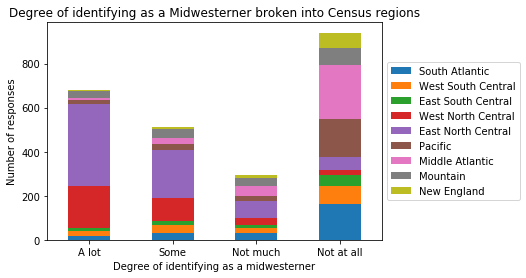

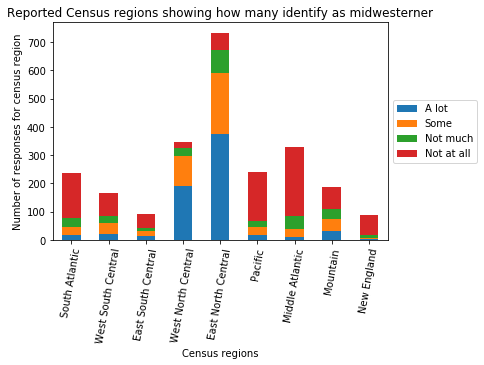

In [53]:
# Create a dataframe to easily stack data for census breakdown of midwest dataframe: census_bd_m_df
census_bd_m_df = pd.DataFrame(index = ['South Atlantic',
                                       'West South Central',
                                       'East South Central',
                                       'West North Central',
                                       'East North Central',
                                       'Pacific',
                                       'Middle Atlantic',
                                       'Mountain',
                                       'New England'],
                              data = ident_reg(midwest_df))

# Graph the distribution of census regions based on "degree of ident."
census_bd_m_df.swapaxes('index', 'columns').plot(kind='bar', stacked = True)
plt.title('Degree of identifying as a Midwesterner broken into Census regions')
plt.xlabel('Degree of identifying as a midwesterner')
plt.xticks(rotation = '0')
plt.ylabel('Number of responses')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Graph the distribution of census data looking at reported census regions
# broken into how many identified as a Midwesterner.
census_bd_m_df.plot(kind='bar', stacked = True)
plt.title('Reported Census regions showing how many identify as midwesterner')
plt.xlabel('Census regions')
plt.xticks(rotation = '80')
plt.ylabel('Number of responses for census region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

#### __Analysis of Census Region data for Midwest data:__
Overwhelmingly, for the midwest data, we can see that those that identify "A lot" and "Some" report to be in the regions of "West North Central" and "East North Central" United States.